### Anomaly detection - Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
signals_test2_channels = sio.loadmat('signals_test2_channels.mat')
signals_test2_channels

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Apr  5 11:12:30 2021',
 '__version__': '1.0',
 '__globals__': [],
 'Ch1': array([[-0.049, -0.042,  0.015, ..., -0.002, -0.002, -0.002]]),
 'Ch2': array([[-0.071, -0.073,  0.   , ...,  0.   , -0.002,  0.   ]]),
 'Ch3': array([[-0.132, -0.007,  0.007, ...,  0.   ,  0.   ,  0.   ]]),
 'Ch4': array([[-0.01 , -0.105,  0.   , ..., -0.002, -0.002, -0.002]])}

In [3]:
Ch1_test2 = signals_test2_channels['Ch1']
Ch1_test2 = Ch1_test2[0]
t_test2 =  np.linspace(0, 10 * len(Ch1_test2), len(Ch1_test2))

In [4]:
signal_duration_test2 = 9840
nfiles_test2 = 984
onset_anomalies_PCA_GMM_Ch1 = (signal_duration_test2 - 2820) * int(len(Ch1_test2)/nfiles_test2)
onset_anomalies_PCA_ZS_Ch1 = (signal_duration_test2 - 3720) * int(len(Ch1_test2)/nfiles_test2)
onset_anomalies_Autoencoder_GMM_Ch1 = (signal_duration_test2 - 2810) * int(len(Ch1_test2)/nfiles_test2)
onset_anomalies_Autoencoder_ZS_Ch1 = (signal_duration_test2 - 2810) * int(len(Ch1_test2)/nfiles_test2)
onset_anomalies_OCSVM = (signal_duration_test2 - 3760) * int(len(Ch1_test2)/nfiles_test2)

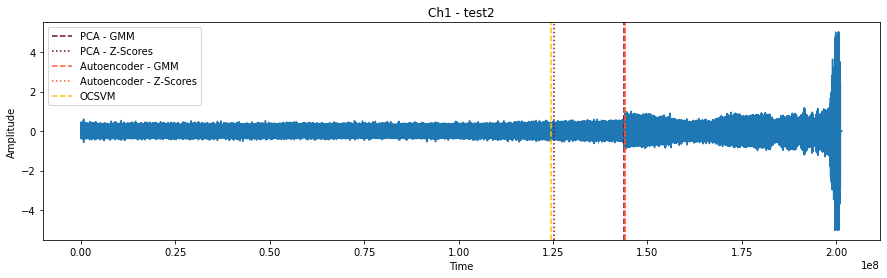

In [5]:
plt.figure(figsize=(15,4))
plt.plot(t_test2, Ch1_test2)
plt.axvline(onset_anomalies_PCA_GMM_Ch1, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
plt.axvline(onset_anomalies_PCA_ZS_Ch1, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
plt.axvline(onset_anomalies_Autoencoder_GMM_Ch1, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
plt.axvline(onset_anomalies_Autoencoder_ZS_Ch1, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
plt.axvline(onset_anomalies_OCSVM, color = '#FFC300', linestyle='--', label = 'OCSVM')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ch1 - test2')
plt.legend()

In [6]:
signals_test1_channels = sio.loadmat('signals_test1_channels.mat')
Ch5_test1 = signals_test1_channels['Ch5']
Ch6_test1 = signals_test1_channels['Ch6']
Ch5_test1 = Ch5_test1[0]
Ch6_test1 = Ch6_test1[0]
t_test1 =  np.linspace(0, 10 * len(Ch5_test1), len(Ch5_test1))

In [7]:
signal_duration_test1 = 43 * 5 + (2156 - 43) * 10
nfiles_test1 = 2156
onset_anomalies_PCA_GMM_Ch5 = (signal_duration_test1 - 3320) * int(len(Ch5_test1)/nfiles_test1)
onset_anomalies_PCA_ZS_Ch5 = (signal_duration_test1 - 3320) * int(len(Ch5_test1)/nfiles_test1)
onset_anomalies_Autoencoder_GMM_Ch5 = (signal_duration_test1 - 3280) * int(len(Ch5_test1)/nfiles_test1)
onset_anomalies_Autoencoder_ZS_Ch5 = (signal_duration_test1 - 3280) * int(len(Ch5_test1)/nfiles_test1)
onset_anomalies_OCSVM_Ch5 = (signal_duration_test1 - 3350) * int(len(Ch5_test1)/nfiles_test1)

onset_anomalies_PCA_GMM_Ch6 = (signal_duration_test1 - 2820) * int(len(Ch6_test1)/nfiles_test1)
onset_anomalies_PCA_ZS_Ch6 = (signal_duration_test1 - 3720) * int(len(Ch6_test1)/nfiles_test1)
onset_anomalies_Autoencoder_GMM_Ch6 = (signal_duration_test1 - 3290) * int(len(Ch6_test1)/nfiles_test1)
onset_anomalies_Autoencoder_ZS_Ch6 = (signal_duration_test1 - 3090) * int(len(Ch6_test1)/nfiles_test1)
onset_anomalies_OCSVM_Ch6 = (signal_duration_test1 - 4350) * int(len(Ch5_test1)/nfiles_test1)

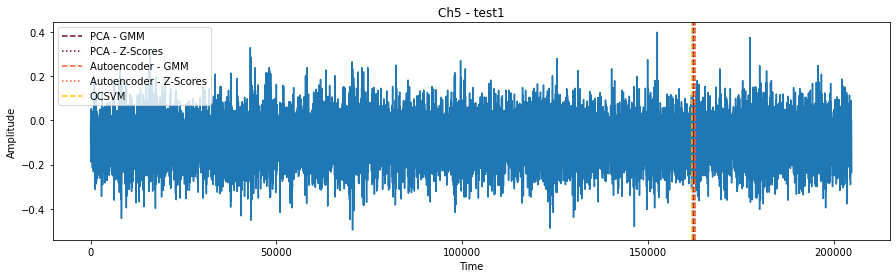

In [8]:
plt.figure(figsize=(15,4))
plt.plot(t_test1, Ch5_test1)
plt.axvline(onset_anomalies_PCA_GMM_Ch5, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
plt.axvline(onset_anomalies_PCA_ZS_Ch5, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
plt.axvline(onset_anomalies_Autoencoder_GMM_Ch5, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
plt.axvline(onset_anomalies_Autoencoder_ZS_Ch5, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
plt.axvline(onset_anomalies_OCSVM_Ch5, color = '#FFC300', linestyle='--', label = 'OCSVM')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ch5 - test1')
plt.legend()

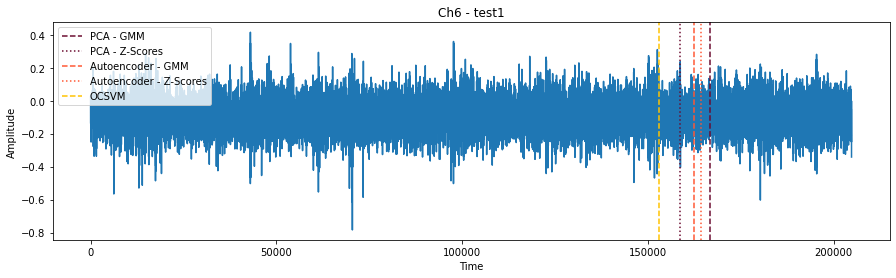

In [9]:
plt.figure(figsize=(15,4))
plt.plot(t_test1, Ch6_test1)
plt.axvline(onset_anomalies_PCA_GMM_Ch6, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
plt.axvline(onset_anomalies_PCA_ZS_Ch6, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
plt.axvline(onset_anomalies_Autoencoder_GMM_Ch6, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
plt.axvline(onset_anomalies_Autoencoder_ZS_Ch6, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
plt.axvline(onset_anomalies_OCSVM_Ch6, color = '#FFC300', linestyle='--', label = 'OCSVM')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ch6 - test1')
plt.legend(loc = 2)

In [10]:
signals_test3_channels = sio.loadmat('signals_test3_channels.mat')
signals_test3_channels

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Apr 13 11:04:39 2021',
 '__version__': '1.0',
 '__globals__': [],
 'Ch1': array([[0.034, 0.103, 0.095, ..., 0.   , 0.002, 0.   ]]),
 'Ch2': array([[ 0.264,  0.083, -0.039, ...,  0.002,  0.002,  0.002]]),
 'Ch3': array([[ 0.039, -0.061, -0.007, ...,  0.005,  0.002,  0.005]]),
 'Ch4': array([[-0.046, -0.012,  0.039, ...,  0.   ,  0.002,  0.   ]])}

In [11]:
Ch3_test3 = signals_test3_channels['Ch3']
Ch3_test3 = Ch3_test3[0]
t_test3 =  np.linspace(0, 10 * len(Ch3_test3), len(Ch3_test3))

In [12]:
signal_duration_test3 = 6324 * 10
nfiles_test3 = 6324
onset_anomalies_PCA_GMM_Ch3 = (signal_duration_test3 - 1650) * int(len(Ch3_test3)/nfiles_test3)
onset_anomalies_PCA_ZS_Ch3 = (signal_duration_test3 - 1720) * int(len(Ch3_test3)/nfiles_test3)
onset_anomalies_Autoencoder_GMM_Ch3 = (signal_duration_test3 - 3550) * int(len(Ch3_test3)/nfiles_test3)
onset_anomalies_Autoencoder_ZS_Ch3 = (signal_duration_test3 - 1620) * int(len(Ch3_test3)/nfiles_test3)
onset_anomalies_OCSVM_Ch3 = (signal_duration_test3 - 2200) * int(len(Ch3_test3)/nfiles_test3)

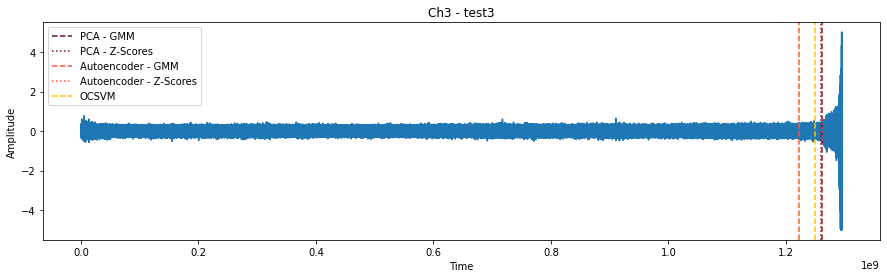

In [13]:
plt.figure(figsize=(15,4))
plt.plot(t_test3, Ch3_test3)
plt.axvline(onset_anomalies_PCA_GMM_Ch3, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
plt.axvline(onset_anomalies_PCA_ZS_Ch3, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
plt.axvline(onset_anomalies_Autoencoder_GMM_Ch3, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
plt.axvline(onset_anomalies_Autoencoder_ZS_Ch3, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
plt.axvline(onset_anomalies_OCSVM_Ch3, color = '#FFC300', linestyle='--', label = 'OCSVM')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ch3 - test3')
plt.legend(loc = 2)